# **Google Advanced Data Analytics**
## **Capstone project: Providing data-driven suggestions for HR**

Thank you for reviewing my capstone project for Google Advanced Data Analytics!  This project was truly gratifying.

In this scenario, I was given a dataset (provided by Kaggle) on employee data from the HR department of Salifort Motors.  They tasked me in my capacity as a data professional to generate a predictive model to procure insights into employee turnover and to make recommendations for how to maximize retention.

I went through a very general and straightforward process of EDA and modeling, as prescribed herein, and ultimately leveraged a random forest model, knowing that it would be robust to outliers, etc.

### PACKAGES

In [7]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

# pickle
import pickle


### LOAD

In [8]:
df0 = pd.read_csv("../dataset/HR_capstone_dataset.csv")
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EXPLORATION

### Gather basic information about the data

In [10]:
# Gather basic information about the data
print(f'Shape: {df0.shape}')
print('')
df0.info()
print('')
print("** Looks like there are no null values; dataset is complete.")

Shape: (14999, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

** Looks like there are no null values; dataset is complete.


### Gather descriptive statistics about the data

In [11]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [12]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
# Rename columns
def snake_case(input_string):
    input_string = str(input_string)
    snake_case_string = input_string.lower()
    return snake_case_string

df1 = df0.rename(columns=snake_case)
df1 = df1.rename(columns={'time_spend_company':'tenure','average_montly_hours':'average_monthly_hours'})
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [14]:
# Check for missing values
df1.isnull().sum().sum()

0

### Check duplicates

In [15]:
# Check for duplicates
df1.duplicated().sum()

3008

In [16]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


** Because each record is assumed to be a different employee, then I have determined to not drop duplicates.

### Check outliers

In [17]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

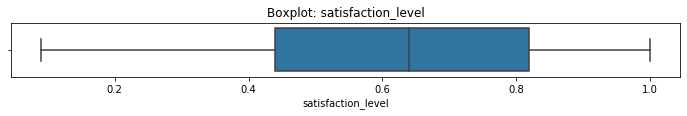

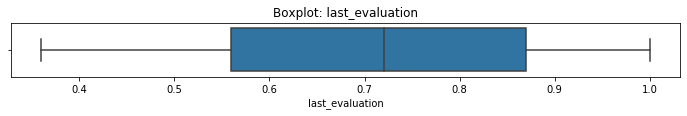

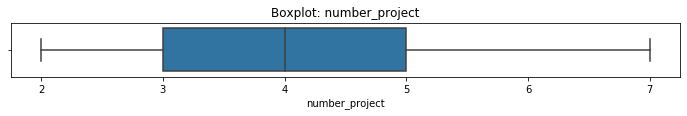

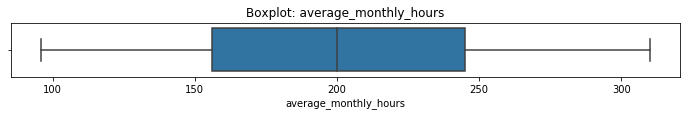

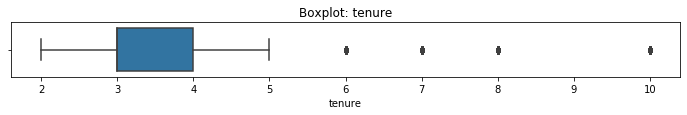

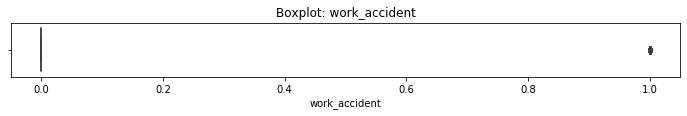

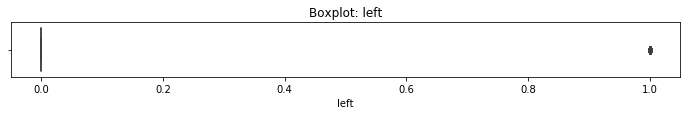

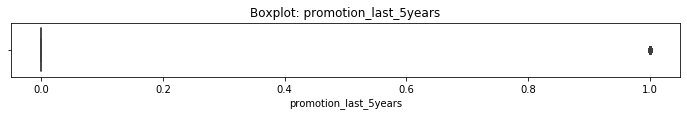

In [28]:
## function to create boxplots for every column
def box_plots(column_name):
    for column_name in df1.columns:
        if df1[column_name].dtype in [int, float]:
            plt.figure(figsize=(12,1))
            sns.boxplot(x=df1[column_name])
            plt.xlabel(column_name)
            plt.title(f'Boxplot: {column_name}')
            plt.show() 
box_plots(df1);



In [23]:
# To determine the number of rows containing outliers

# helper function
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = len(column[(column < lower_bound) | (column > upper_bound)])
    return outliers_count

# Dictionary to store the counts of outliers for each column
outliers_counts = {}

# Iterate through columns
for column_name in df1.columns:
    if df1[column_name].dtype != 'object':
        outliers_counts[column_name] = count_outliers(df1[column_name])

# Display the counts of outliers for each column
for column_name, count in outliers_counts.items():
    print(f"'{column_name}': {count} outliers")
    
    

'satisfaction_level': 0 outliers
'last_evaluation': 0 outliers
'number_project': 0 outliers
'average_monthly_hours': 0 outliers
'tenure': 1282 outliers
'work_accident': 2169 outliers
'left': 3571 outliers
'promotion_last_5years': 319 outliers


My random forest model will be robust to outliers, so I'm not concerned with removing them.  I may remove them for purposes of creating other models at another time.

### EDA - ANALYSIS

1. There's not really much to observe with the EDA I've performed thus far...it's really general stuff, really.  There are no duplicates, 'time_spend_company' has 1282 outliers 'work_accident' has 2169 outliers 'left' has 3571 outliers, 'promotion_last_5years' has 319 outliers, and there 14,999 rows of data.  I decided not to drop any duplicates, and have not yet determined how to handle outliers (they will be manipulated later on for purposes of each model type).

2. Distributions of features seem to be pretty unextraordinary.  High-level boxplot analysis suggests that: 
 (a) Employees generally rate their satisfaction higher than lower
 (b) Employees are typically working on 3-5 projects in a given year
 (c) Employees are typically working between 150 and 250 hours per month
 (d) Employees last evaluation ratings range between 0.5 to 0.9.

3. The only real transformation I employed was snake casing; I will handle outliers and duplicates at another time where necessary.

4. Purposes of EDA include ensuring that the data is clean (scrubbed), to understand the parameters I'm working with, to encode the data if necessary, and to remove duplicates, outliers, and null values as needed.

5. I am largely utilizing internet resources, package documentation, and prior module reference to complete this stage.

6. There are no ethical considerations at this stage, to my knowledge.

### EMPLOYEE TURNOVER METRICS

In [85]:
# Get numbers of people who left vs. stayed
print('0: Stayed; 1: Left')
left_df = pd.DataFrame(df1['left'].value_counts())
print(df1['left'].value_counts())
print('')
# Get percentages of people who left vs. stayed
left_df_total = left_df.loc[0,'left'] + left_df.loc[1,'left']
percent_left = left_df.loc[1,'left'] / left_df_total
percent_stayed = left_df.loc[0,'left'] / left_df_total

print(f'Percentage that left: {percent_left: .2%}')
print(f'Percentage that stayed: {percent_stayed: .2%}')

0: Stayed; 1: Left
0    11428
1     3571
Name: left, dtype: int64

Percentage that left:  23.81%
Percentage that stayed:  76.19%


### DATA VISUALIZATION

In [29]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

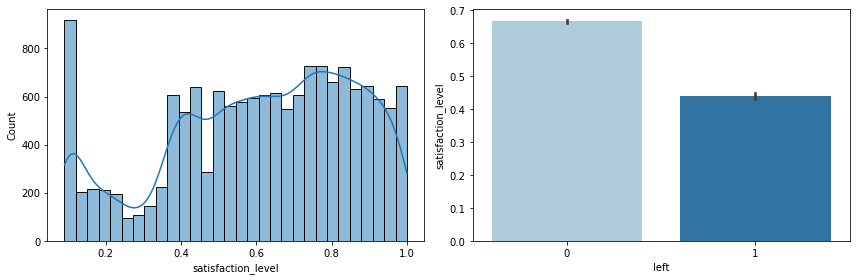

In [86]:
## compare count of people who left/stayed to their satisfaction level

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df1,x='satisfaction_level',palette='Paired',kde=True, ax=axes[0])
sns.barplot(data=df1,x='left',y='satisfaction_level',palette='Paired',ax=axes[1])
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

This viz generally demonstrates that there are an alarmingly high number of employees who rated their satisfaction the lowest possible.

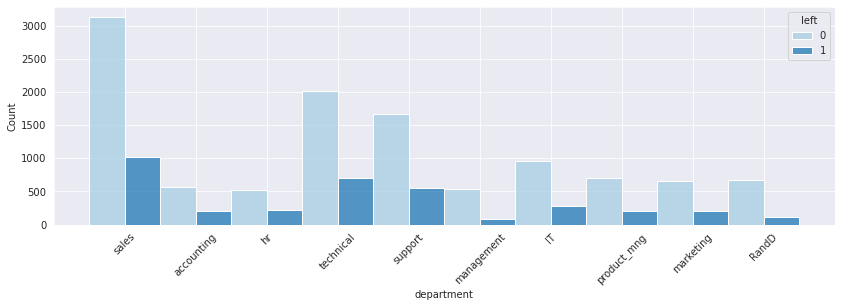

In [87]:
## next I'll look a little analyze retention over all departments
sns.set_style('darkgrid')
plt.figure(figsize=(14, 4))

sns.histplot(data=df1,x='department',hue='left',multiple='dodge',palette='Paired')
plt.xticks(rotation=45)


plt.show()


This viz represents that Sales department has the greatest proportion of employees who stayed versus those who left, suggesting that there may be something unique to the sales department that contributes to retention.  Otherwise, the viz represents that accross all departments, the ratio of employees that stayed to those that left is generally consistent and not really dependent on department.  Most employees stay, but it's generally the same proportion that leave within each department.  This also shows that all departments need to work on retention independently.

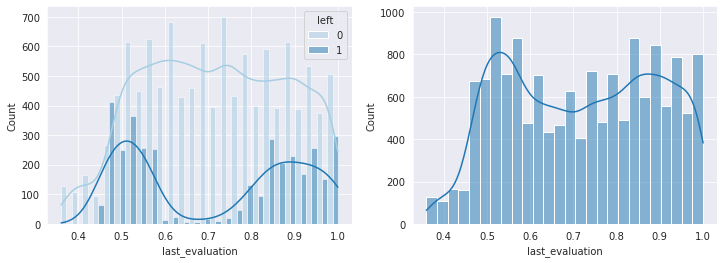

In [88]:
## next I'll look at last evaluation scores

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df1,x='last_evaluation',hue='left',palette='Paired',multiple='dodge',kde=True, ax=axes[0]);
sns.histplot(data=df1,x='last_evaluation',palette='Paired',multiple='dodge',kde=True, ax=axes[1]);




This viz shows that employees left the company almost regardless of the score they got on their last evaluation.  There were more employees that stayed given a low evaluation score than left, actually, suggesting that the absolute lowest rated employees didn't actually leave.  Of note, it appears that employees that scored in the 0.6-0.7 range did not exhibit much turnover.  Is it perhaps safe to infer that scoring employees in this range could contribute to retention? Leveraging this data to manipulate employee retention may be considered unethical, because it would be sort of pschosocial engineering.

The standard average work hours per month is 160, which is 40 hours per week in a general month (4 weeks).


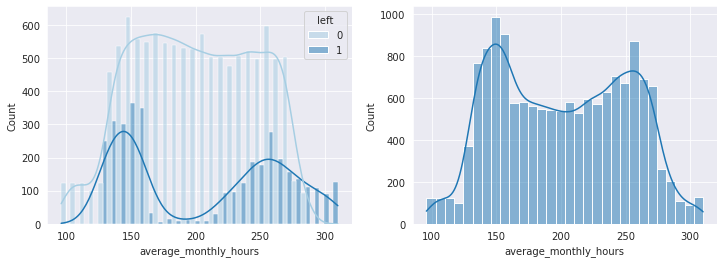

In [89]:
## next I'll look at average monthly hours of work

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(data=df1,x='average_monthly_hours',hue='left',palette='Paired',multiple='dodge',kde=True, ax=axes[0]);
sns.histplot(data=df1,x='average_monthly_hours',palette='Paired',multiple='dodge',kde=True, ax=axes[1]);

print(f'The standard average work hours per month is {40*4}, which is 40 hours per week in a general month (4 weeks).')


This basic viz suggests that employees generally stay when their average monthly work hours are between 175-200 hours.  The distribution of the count of employees working each monthly hours average (to the right) represents that it is not just a small number of employees that are working within that 175-200 hour range.  This raises a question of whether or not optimal average work hours are dependent on department.  Some additional observations include: 
* Employees who worked part-time (specifically less than 125 hours per month) do not appear to have exhibited turnover.
* Employees who worked at or slightly above the "standard average" of monthly hours (160-200 hours) did not appear to exhibit turnover.
* It appears that there is a certain number of monthly hours that employees inevitably quit (somehwere in the 275+ range), which is confirmed by there being mostly (or all) 1's for 'left' feature.
* There appear to be definitive peaks at or around 150 monthly hours and 250 monthly hours.

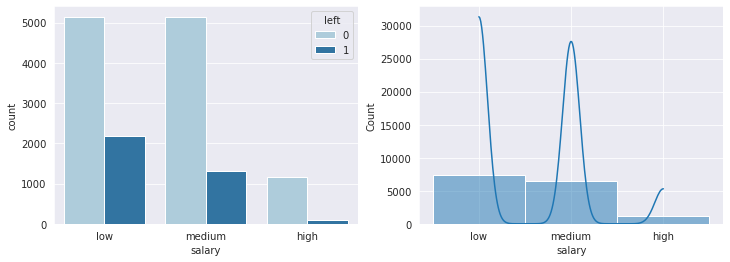

In [90]:
## next I'll look at salary
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set_style('darkgrid')
sns.countplot(data=df1, x='salary', hue='left', palette='Paired',ax=axes[0])

sns.histplot(data=df1,x='salary',palette='Paired',multiple='dodge',kde=True, ax=axes[1]);
plt.show()


This simple viz exhibits that there may be some attribution of salary to turnover, but it's really only obvious when comparing low salary to medium salary.  Simply boosting salaries in the low range could help with some retention.  But this probably isn't the best predicting feature for our model.

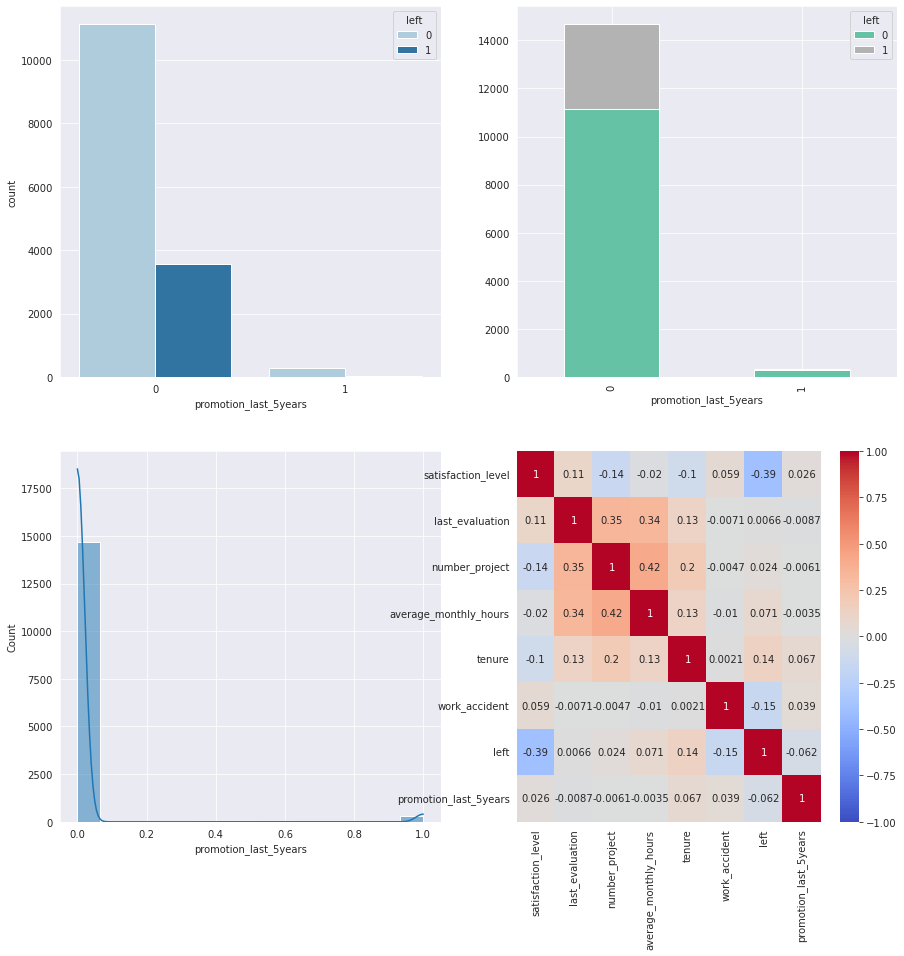

In [91]:
## next I'll look at promotions in the last 5 years

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# subplot: countplot
sns.countplot(data=df1,x='promotion_last_5years',hue='left',palette='Paired',ax=axes[0,0])

# subplot: stacked barplot
promotion_turnover = df1.groupby(['promotion_last_5years','left']).size().unstack(fill_value=0)
promotion_turnover.plot(kind='bar',colormap='Set2',stacked=True,ax=axes[0,1])

# subplot: heatmap
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,ax=axes[1,1])

# subplot: count
sns.histplot(data=df1,x='promotion_last_5years',palette='Paired',multiple='dodge',kde=True, ax=axes[1,0]);



Well...this is obviously a company that doesn't promote anyone.  Thus, there is really no historical data with which to make any inferences, nor build any models.  This may be an area of great potential, as it could significantly alter future data and models.

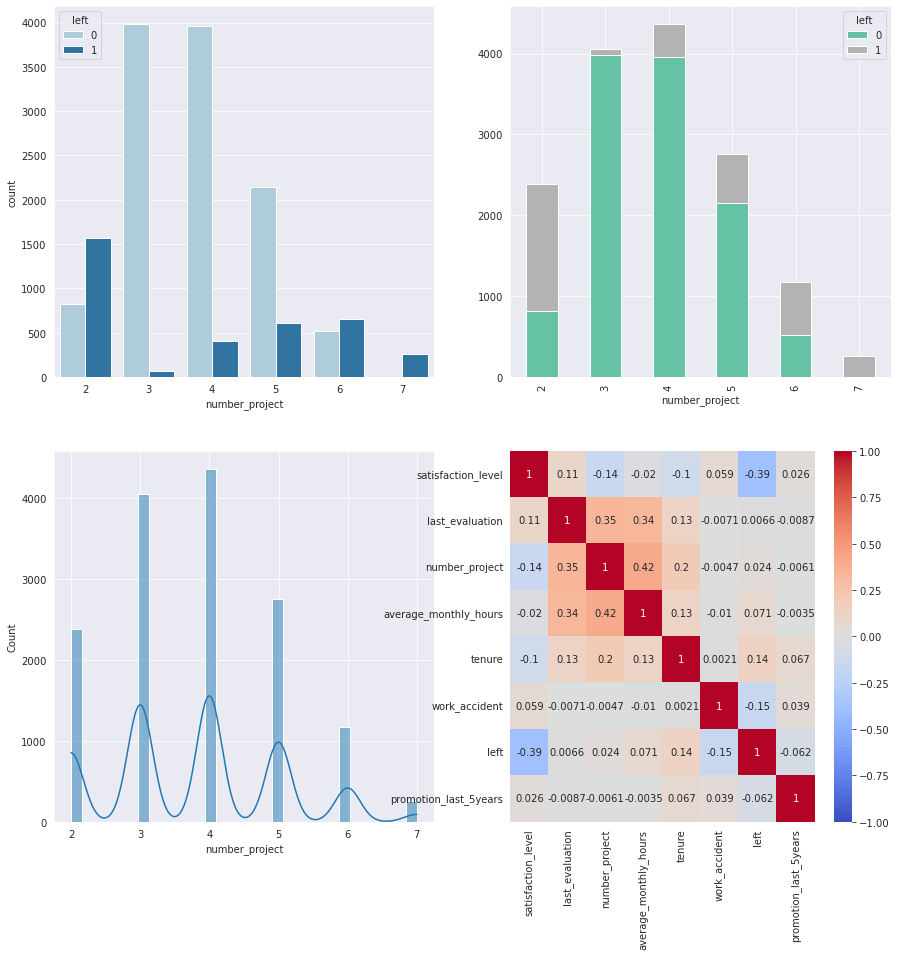

In [92]:
## next I'll look at number of projects

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# subplot: countplot
sns.countplot(data=df1,x='number_project',hue='left',palette='Paired',ax=axes[0,0])

# subplot: stacked barplot
promotion_turnover = df1.groupby(['number_project','left']).size().unstack(fill_value=0)
promotion_turnover.plot(kind='bar',colormap='Set2',stacked=True,ax=axes[0,1])

# subplot: heatmap
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,ax=axes[1,1])

# subplot: count
sns.histplot(data=df1,x='number_project',palette='Paired',multiple='dodge',kde=True, ax=axes[1,0]);



This viz demonstrates that number of projects didn't necessarily contribute to much turnover, other than where employees worked on 7 projects and all left the company.  Of course, it may be reasonably inferred that more projects contributes to higher average monthly work hours.  Additionally, where employees weren't given enough projects (specifically 2 or less projects), they appear to have left.

/Users/danielcarrillo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


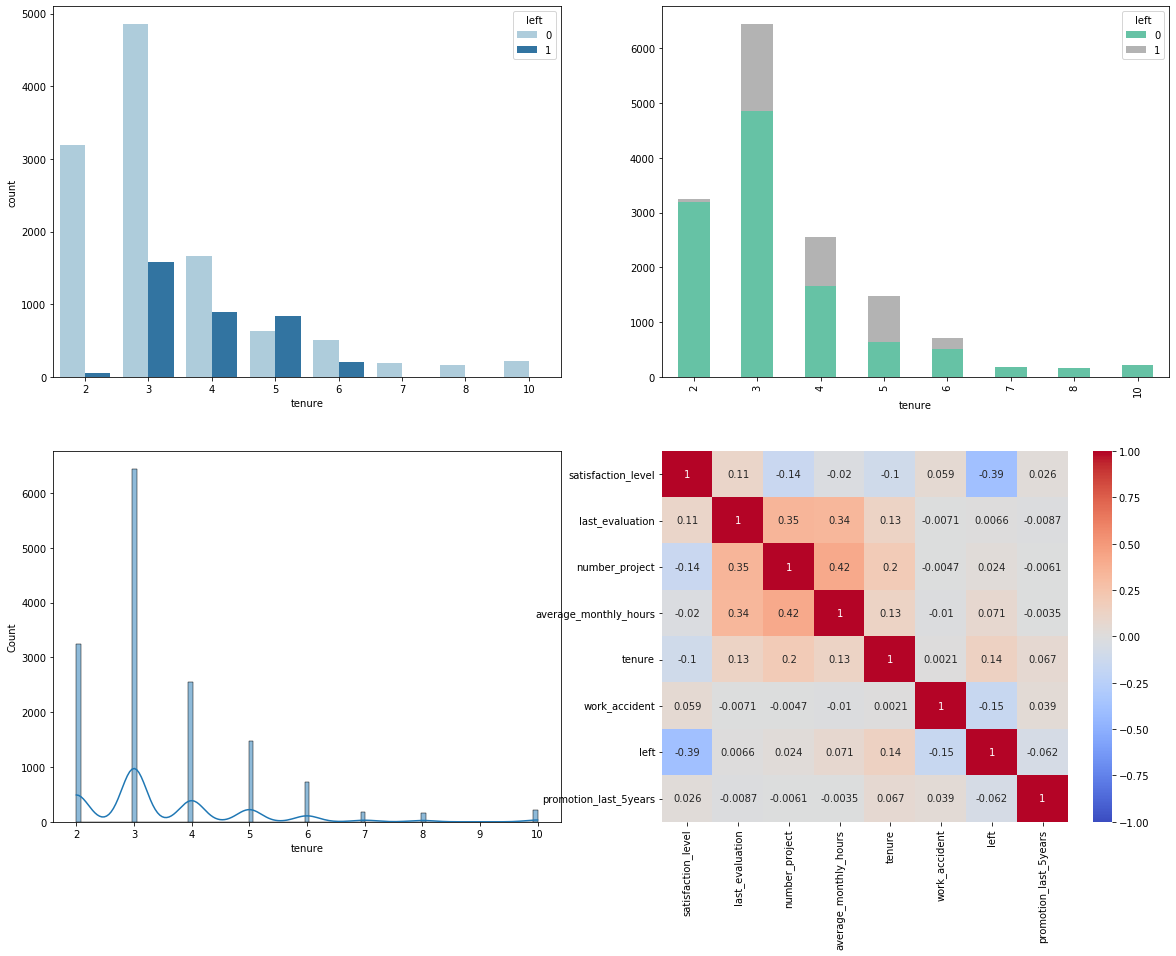

In [30]:
## lastly, I'll take a good look at tenure


fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# subplot: countplot
sns.countplot(data=df1,x='tenure',hue='left',palette='Paired',ax=axes[0,0])

# subplot: stacked barplot
promotion_turnover = df1.groupby(['tenure','left']).size().unstack(fill_value=0)
promotion_turnover.plot(kind='bar',colormap='Set2',stacked=True,ax=axes[0,1])

# subplot: heatmap
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',vmin=-1,vmax=1,ax=axes[1,1])

# subplot: count
sns.histplot(data=df1,x='tenure',palette='Paired',multiple='dodge',kde=True, ax=axes[1,0]);



It appears that many employees leave around the 3-5 year mark. At 6 years, retention starts to stabilize.  There are appear to be only a couple hundred employees or so with 7+ year tenure, all of which have not left.  Perhaps there is opportunity to maximize retention by enticing employees to stick around longer than 5 years.

### INSIGHTS

* Promotions is probably a useless feature, so I'll probably drop it--there is really no predictive power there because no promotions were given (however, this may still be a huge determinent of retention, but its predictive power is untapped without any historical data).
* Average monthly work hours seems to be a strong predictive feature of both satisfaction level and turnover, with strong data and an obvious distribution pattern.
* It's important to consider features' correlation to satisfaction level in addition to their correlation to turnover--in fact, I may add an additional analysis of each feature's relationship to satisfaction level, and then do a final re-analysis of satisfaction level to turnover to tie it all together.
* Tenure appears to be another strong predictive feature, as well as number of projects, with definite patterns of employees leaving where they didn't have enough projects (or far too many), and at the 3-5 year mark.
* Evaluation score appears to be another solid feature, with employees definitively leaving if they score too low or two high, with the sweet spot being 0.6-0.7 (this is where no employees leave).

### MODELING

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [45]:
# drop non-important features
df2 = df1.drop(['promotion_last_5years','department'],axis=1)

In [46]:
# encode salary data
df3 = pd.get_dummies(df2,columns=['salary'])


In [47]:
df3.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0


In [48]:
# define variables
y = df3['left']
X = df3.copy()
X = X.drop('left',axis=1)

In [59]:
## split
# test and training data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# validation data
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=42)

In [50]:
## tuning
# hyperparameters
cv_params = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

# predefined split
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [51]:
# instantiate model
rf = RandomForestClassifier(random_state=42)

In [52]:
# Grid Search validation
rf_val = GridSearchCV(rf, cv_params,cv=custom_split,refit='f1',n_jobs=-1,verbose=1)

In [53]:
# fit random forest model
%time
rf_val.fit(X_train,y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.82 µs
Fitting 1 folds for each of 32 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    4.2s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ...,  0,  0])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,

In [54]:
# optimal parameters
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [55]:
# optimal classifer
rf_opt = RandomForestClassifier(max_depth=50,max_features='sqrt',max_samples=0.9,
                                min_samples_leaf=1,min_samples_split=0.001,
                               n_estimators=50)

In [56]:
# refit optimal classifer
%time
rf_opt.fit(X_train,y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=0.9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
# predict
y_pred = rf_opt.predict(X_test)

In [82]:
# scoring (precison, accuracy, recall, f1)

precision = precision_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)

score_table = pd.DataFrame({'Model': ["Tuned Random Forest"],
                        'F1':  [f1],
                        'Recall': [recall],
                        'Precision': [precision],
                        'Accuracy': [accuracy]
                      }
                    )

score_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Random Forest,0.950058,0.911929,0.991515,0.977067


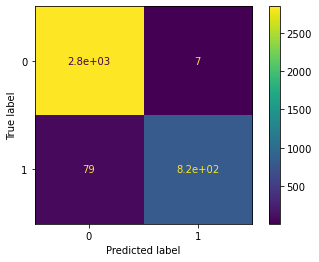

In [77]:
# random forest confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_opt.classes_)
disp.plot();

* Decent scores, but a confusion matrix represents a low True Negatives score, which means it's making Type 1 errors (false positives); but then again, it has a high True Positives score.
* I could try a boosted model to enhance predictive power and also isolate the best predictive features.


It appears that maybe my model is great at predicting if people stay, but not if people leave...maybe this is due to an imbalanced dataset.  But given the metric scores, I think that I am confident in this model.  I think I would feel comfortable moving forward with this model.

In [76]:
# feature importance analysis

feature_importances = rf_opt.feature_importances_
feature_importances

feature_importance_df = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances})

feature_importance_df = feature_importance_df.sort_values('Importance',ascending=False).reset_index().drop('index',axis=1)
feature_importance_df


,Feature,Importance
0,satisfaction_level,0.364820
1,number_project,0.191900
2,tenure,0.189346
3,average_monthly_hours,0.137605
4,last_evaluation,0.105815
5,work_accident,0.004813
6,salary_high,0.002580
7,salary_low,0.002324
8,salary_medium,0.000796


It appears that the top four most important predictors are satisfaction level, number of projects, tenure, and average monthly hours (in that order)

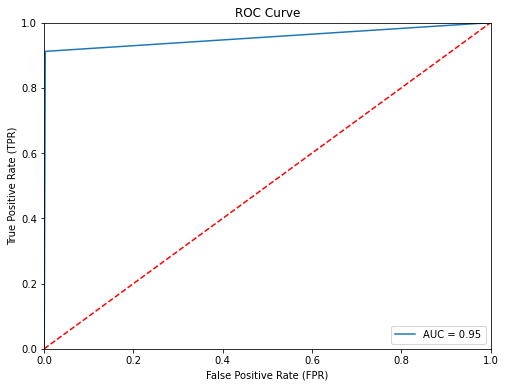

AUR-ROC Score: 0.9547375467002404


,Model,F1,Recall,Precision,Accuracy,AUC-ROC
0,Tuned Random Forest,0.950058,0.911929,0.991515,0.977067,0.954738


In [84]:
# AUC-ROC

# predicted probabilities 
y_scores = rf_opt.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)  

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

# print score
print(f'AUR-ROC Score: {auc_roc}')

# add score to score_table and redisplay
score_table['AUC-ROC'] = auc_roc
score_table

An analysis of AUC-ROC score demonstrates that the model has significantly more predictive power than random guessing.

### Summary of model results

Below is a table summary of the results of the model.  See prior visualizations for additional presentation of results (confusion matrix, notes, AUC-ROC graph, etc.)

In [94]:
print('Summary Table of Scoring')
score_table

Summary Table of Scoring


,Model,F1,Recall,Precision,Accuracy,AUC-ROC
0,Tuned Random Forest,0.950058,0.911929,0.991515,0.977067,0.954738


### DISCUSSION, RECOMMENDATIONS, NEXT STEPS

Key insights:
* The random forest model demonstrated very agreeable, and yet realistic scoring, and accordingly represents reasonable/realistic predictive power
* A boosted model, or even a regression model, might be employed to compare predictive power
* Ultimately, the model gives more predictive weight to satisfaction level, number of projects, and tenure
* Given how robust random forest models are, all model assumptions are met, so we can have reasonable comfort that the model is neither overfitted or underfitted, and may reasonably rely on its predictive power

Business recommendations:
* Experiment with promotions to see how they impact retention versus turnover, and to create even more predictive power (there was no data to employ in this dataset)
* Satisfaction level is the number one predictor of whether or not employees will stay, and it is evident that the biggest predictors of satisfaction level are tenure, number of projects, and average monthly work hours.
* It appears that employees are more likely to stay on with the company where there work hours are more in line with a standard average monthly workload, 3 projects (no more and no less), and 2 years or less of tenure (otherwise, 6+ tenure).
* Ultimately the data represents that most employees will leave after 2 years, so the business should focus on maximizing satisfaction levels within those first two years by ensuring standard average work hours and no more and no less than 3 projects per employee.

Potential recommendations to the company and/or manager(s):
* Invest heavily into maximizing satisfaction level of new employees
* Promote employees after 2 years (no exceptions); this may help to sustain retention
* Increase budget for raises upon promotion
* Be careful not to burn out employees

Model improvement:
* Gradient boosting could help to improve the model
* I didn't actually drop any duplicates, with the assumption that every record of data is truly a different employee--perhaps I could improve the model by dropping duplicates
* I could compare the random forest classifer with logistic regression and decision tree models--perhaps simpler is in fact better, but it would require more extensive pre-processing in order to satisfy distinct model assumptions
* Additional feature engineering could enhance the model (indexing satisfaction score to some sort of aggregate metric of all other features and then modeling off of the new feature)

Responses to potential questions:
* "What does this model tell us?" The model tells us that satisfaction level is the number one predictor of rentention/turnover, followed by number of projects, tenure, and average monthly work hours, with 99% precision and 98% accuracy.
* "How do you evaluate this model's effictiveness?" With metric scoring, including precision, recall, harmonic mean (f1), area-under-the-curve, and accuracy, all of which are not perfect but really good scores.  They're also more realistic scores, which are enhances our confidence that the predictive features we identified are the best.

Ethical considerations:
* Satisfaction levels should not be psychosocially engineered (this means that there is better retention when employees don't score too high and believe they're ready to move on to a new employer, or too low and believe they are no good at this company and also ready to move on--which could lead to managers manipulating their evaluation scores to ensure retention)
